## K-Means Clustering

K-Means clustering is an unsupervised learning algorithm which takes unlabeled feature vectors and groups them into clusters according to similar features. K is the specified number of clusters to group the data into. 

<img src="k-means.png" width=600 />


The algorithm:
1. Choose the number of clusters k
2. Select k random points from the data as initial centroids
3. Calculate the distance from each point to each centroid
4. Create clusters by assigning points to the closest centroid
5. Update the centroids by the mean of all points in the cluster

Repeat 3-5 until the centroids stabilize.
___

In this notebook we will use the following libraries:
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def euclidean_distance(p1, p2):
    """Return euclidean distance between feature vector and centroid."""
    return np.sqrt(sum([(p1[i] - p2[i]) ** 2 for i in range(0, len(p1))]))

In [3]:
def k_means_distance(X, centroids, k):
    """Return distances between all feature vectors and centroids."""
    distances = {}
    for p in X:
        temp_dict = {}
        for i in range(k):
            temp_dict[i] = euclidean_distance(p, centroids[i])
        distances[p] = temp_dict
    return distances

In [4]:
def k_means_clusters(X, centroids, k):
    """Assign feature vectors to closest centroid to create clusters."""
    distances = k_means_distance(X, centroids, k)
    clusters = {}
    for p in X:
        clusters[p] = 0
        min_d = distances[p][0]
        for i in range(1, k):
            if distances[p][i] < min_d:
                clusters[p] = i
                min_d = distances[p][i]
    return clusters
        

In [5]:
def k_means_new_centroids(X, centroids, k):
    """Return new centroids based on mean of clusters."""
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j in range(k):
        x = np.mean([p[0] for p in clusters.keys() if clusters[p] == j])
        y = np.mean([p[1] for p in clusters.keys() if clusters[p] == j])
        point = (x, y)
        new_centers.append(point)
    return new_centers

In [6]:
def k_means_algorithm(X, k, ϵ, return_centroids=False):
    centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        j = np.random.randint(len(X)) / len(X)
        centroids.append((X[i][0] + j, X[i][1] - j))
    
    new_centroids = k_means_new_centroids(X, centroids, k)
    j = 1
    while max([euclidean_distance(centroids[i], new_centroids[i]) for i in range(k)]) > ϵ and j < 10000000:
        centroids, new_centroids = new_centroids, k_means_new_centroids(X, new_centroids, k)
        j += 1
    
    if return_centroids == False:
        return k_means_clusters(X, new_centroids, k)
    else:
        return new_centroids
    

___
To test the algorithm we will generate three synthetic clusters of data points.
___

In [7]:
cluster1 = [(np.random.randint(1, 11) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 3) * np.random.rand(), 
             np.random.randint(1, 11) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 2.5) * np.random.rand()) 
            for _ in range(0, 20)]

cluster2 = [(np.random.randint(12, 21) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 3) * np.random.rand(), 
             np.random.randint(12, 21) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 2.5) * np.random.rand()) 
            for _ in range(0, 16)]

cluster3 = [(np.random.randint(23, 28) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 3) * np.random.rand(), 
             np.random.randint(23, 28) + (-1) ** np.random.randint(1, 3) * np.random.randint(1, 2.5) * np.random.rand()) 
            for _ in range(0, 22)]

data = cluster1 + cluster2 + cluster3

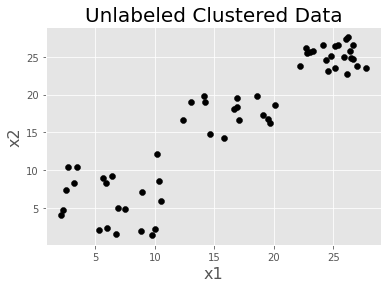

In [8]:
fig, ax = plt.subplots()
ax.scatter(*zip(*data), color='black')
ax.set_title("Unlabeled Clustered Data", fontsize=20)
ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('x2', fontsize=16)
plt.show()

In [9]:
clusters = k_means_algorithm(data, 3, 0.0001)

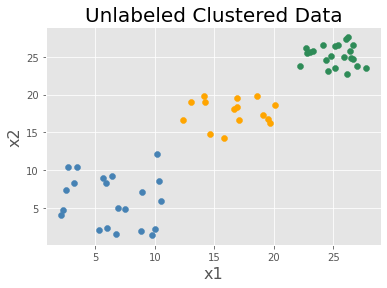

In [11]:
fig, ax = plt.subplots()
ax.scatter(*zip(*[x for x in clusters.keys() if clusters[x] == 0]), color='steelblue')
ax.scatter(*zip(*[x for x in clusters.keys() if clusters[x] == 1]), color='orange')
ax.scatter(*zip(*[x for x in clusters.keys() if clusters[x] == 2]), color='seagreen')
ax.set_title("Unlabeled Clustered Data", fontsize=20)
ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('x2', fontsize=16)
plt.show()